In [ ]:
!pip install -q yfinance

In [ ]:
import pandas as pd
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None  # 판다스 워닝 무시



# 데이터 로드 및 클리닝

In [ ]:
# 모든 기간의 데이터 가져오기
df = yf.Ticker('AAPL').history(period="max")

In [ ]:
# 데이터프레임의 각 컬럼 설명
# Open: 거래일의 시작가격
# High: 거래일 중 최고가격
# Low: 거래일 중 최저가격
# Close: 거래일의 종가
# Volume: 거래량 (거래된 주식의 수)
# Dividends: 주당 배당금
# Stock Splits: 주식 분할 비율 (예: 2는 1:2 분할을 의미)

df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-03 00:00:00-05:00,229.990005,231.830002,225.699997,228.009995,73063300,0.0,0.0
2025-02-04 00:00:00-05:00,227.250000,233.130005,226.649994,232.800003,45067300,0.0,0.0
2025-02-05 00:00:00-05:00,228.529999,232.669998,228.270004,232.470001,39620300,0.0,0.0


In [ ]:
# 컬럼명을 소문자로 변환하고 공백을 _로 대체
df.columns = df.columns.str.lower().str.replace(' ', '_')
df

,open,high,low,close,volume,dividends,stock_splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-03 00:00:00-05:00,229.990005,231.830002,225.699997,228.009995,73063300,0.0,0.0
2025-02-04 00:00:00-05:00,227.250000,233.130005,226.649994,232.800003,45067300,0.0,0.0
2025-02-05 00:00:00-05:00,228.529999,232.669998,228.270004,232.470001,39620300,0.0,0.0


In [ ]:
df.stock_splits.value_counts()

,count
stock_splits,
0.0,11125
2.0,3
7.0,1
4.0,1


Stock Splits (주식 분할)
- 주식 분할은 기업이 기존 주식을 여러 개의 주식으로 나누는 것을 의미합니다
- 예를 들어 2:1 분할의 경우, 기존 1주가 2주로 나뉘며 주가는 1/2로 하락합니다
- 데이터를 보면 애플은 총 5번의 주식 분할이 있었습니다:
  - 2.0 분할이 3회 (1:2 분할)
  - 4.0 분할이 1회 (1:4 분할)
  - 7.0 분할이 1회 (1:7 분할)
- 주식 분할의 목적은 주가를 낮춰 투자자들의 접근성을 높이는 것입니다


In [ ]:
# 주식 분할 배수의 누적값을 계산
df['split_multiplier'] = (df.stock_splits.replace(0, 1)).cumprod()

# # 실제 가격을 계산하기 위해 현재 가격에 누적 분할 배수를 곱함
# df['Real_Open'] = df['Open'] * df['Split_Multiplier']
# df['Real_High'] = df['High'] * df['Split_Multiplier']
# df['Real_Low'] = df['Low'] * df['Split_Multiplier']
# df['Real_Close'] = df['Close'] * df['Split_Multiplier']

# # 결과 확인
# print("주식 분할이 없었다면 실제 가격:")
# df[['Real_Open', 'Real_High', 'Real_Low', 'Real_Close']].tail()


In [ ]:
df.isna().sum()

,0
open,0
high,0
low,0
close,0
volume,0
dividends,0
stock_splits,0


---

# Feature Engineering

주식 보조지표 (Technical Indicators)

1. 이동평균선 (Moving Average)
1. RSI (Relative Strength Index)
1. MACD (Moving Average Convergence Divergence)
1. 볼린저 밴드 (Bollinger Bands)

### 이동평균선(Moving Average)
  - 일정 기간의 주가 평균을 나타내는 지표
  - 단기/중기/장기 추세를 파악하는데 활용
  - 대표적으로 5일, 20일, 60일, 120일 이동평균선 사용

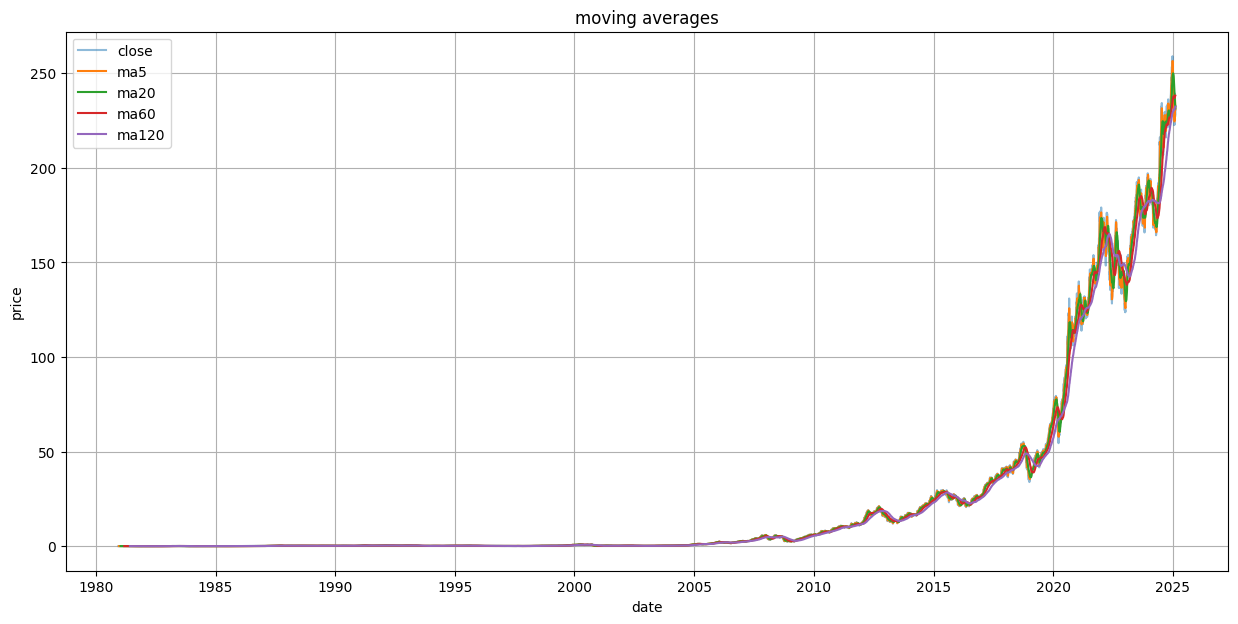

In [ ]:
import matplotlib.pyplot as plt

# 이동평균선 계산
df['ma5'] = df.close.rolling(window=5).mean()
df['ma20'] = df.close.rolling(window=20).mean()
df['ma60'] = df.close.rolling(window=60).mean()
df['ma120'] = df.close.rolling(window=120).mean()

# 이동평균선 시각화
plt.figure(figsize=(15,7))
plt.plot(df.index, df.close, label='close', alpha=0.5)
plt.plot(df.index, df.ma5, label='ma5')
plt.plot(df.index, df.ma20, label='ma20')
plt.plot(df.index, df.ma60, label='ma60')
plt.plot(df.index, df.ma120, label='ma120')
plt.title('moving averages')
plt.xlabel('date')
plt.ylabel('price')
plt.legend()
plt.grid(True)
plt.show()


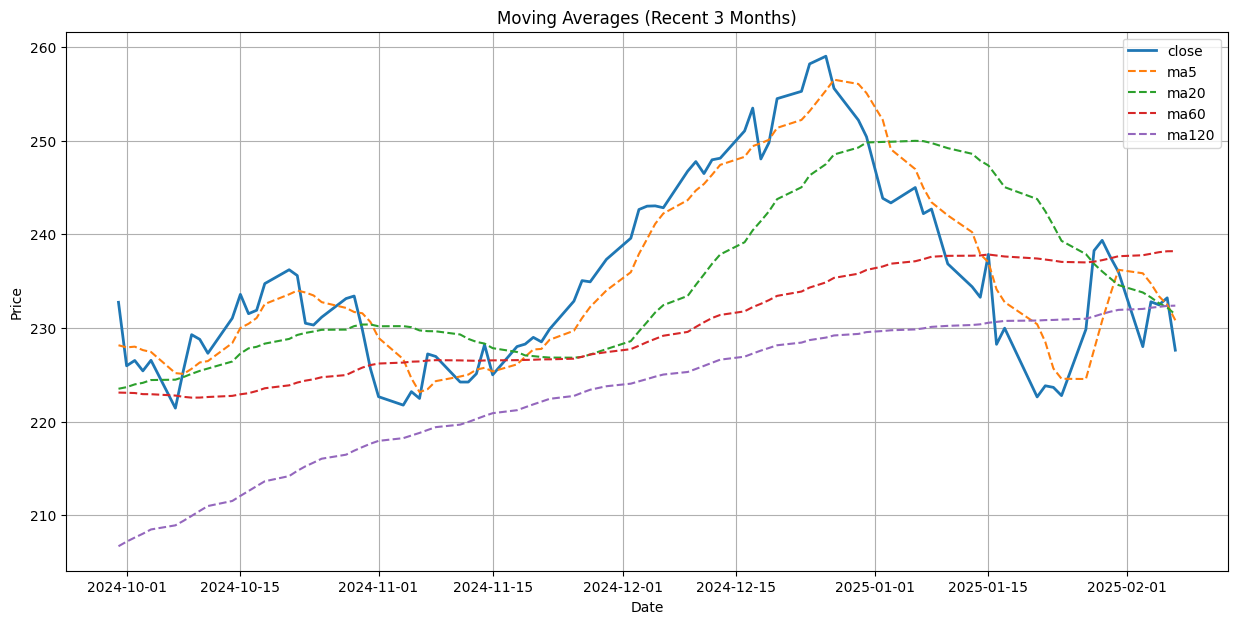

In [ ]:
# 최근 3개월 데이터 추출
recent_3m = df[-90:]  # 최근 90일 데이터

# 최근 3개월 이동평균선 시각화
plt.figure(figsize=(15,7))
plt.plot(recent_3m.index, recent_3m.close, label='close', linewidth=2)  # close 선을 더 굵게
plt.plot(recent_3m.index, recent_3m.ma5, label='ma5', linestyle='--')
plt.plot(recent_3m.index, recent_3m.ma20, label='ma20', linestyle='--')
plt.plot(recent_3m.index, recent_3m.ma60, label='ma60', linestyle='--')
plt.plot(recent_3m.index, recent_3m.ma120, label='ma120', linestyle='--')
plt.title('Moving Averages (Recent 3 Months)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


- 5일 이동평균선(ma5)은 주가의 단기 변동성을 잘 반영하며, 주가와 가장 밀접하게 움직임   

- 20일 이동평균선(ma20)은 중기 추세를 나타내며, 주가의 방향성을 파악하는 데 유용함   

- 60일 이동평균선(ma60)과 120일 이동평균선(ma120)은 장기 추세를 보여주며, 주가의 전반적인 흐름을 이해하는 도움을 줌   

- 최근 주가는 60일 이동평균선 아래로 떨어졌으며, 이는 하락 추세가 지속될 가능성을 시사함   



### RSI (Relative Strength Index)
  - 주가의 상승압력과 하락압력을 비교하여 과매수/과매도 구간 판단
  - 0-100 사이의 값을 가지며, 70이상은 과매수, 30이하는 과매도로 해석
  - 일반적으로 14일을 기준으로 계산

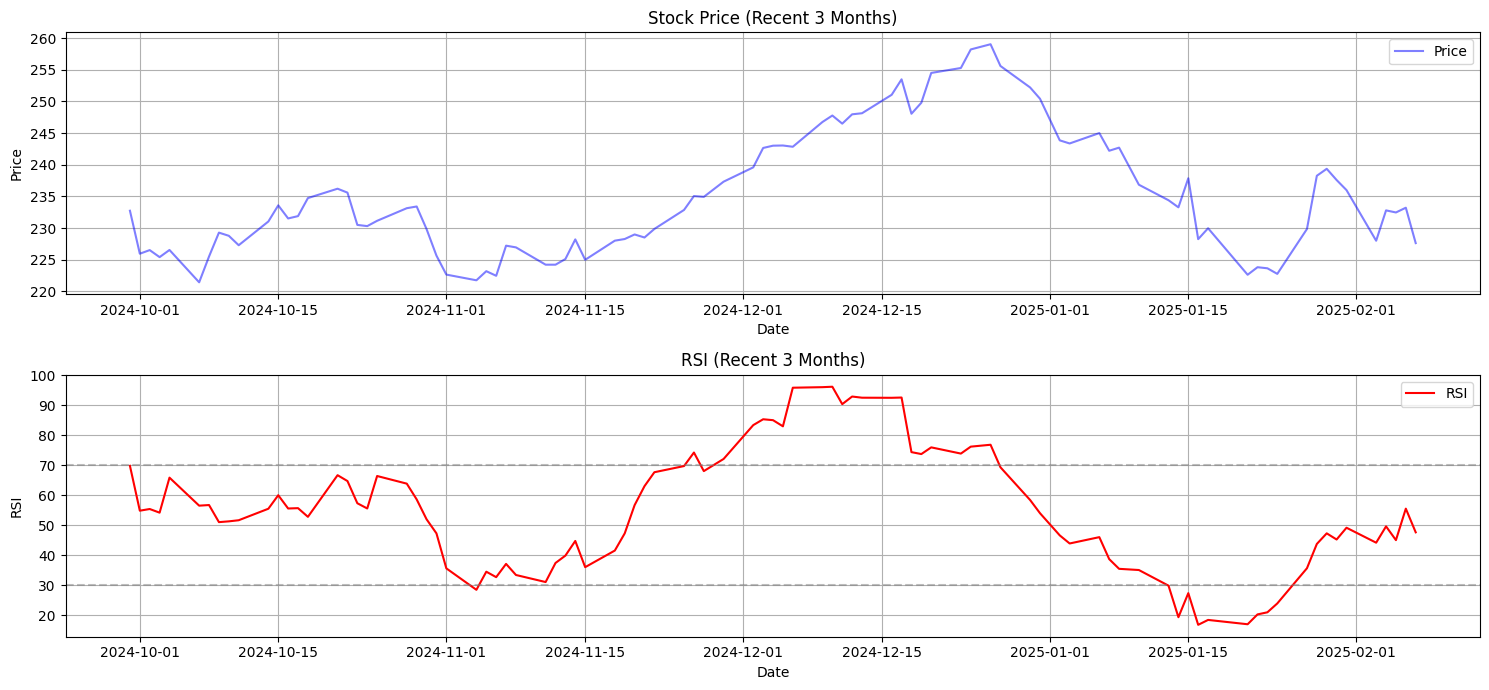

In [ ]:
# RSI 계산 함수
def get_rsi(close, period=14):
    delta = close.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# 14일 RSI 계산
df['rsi14'] = get_rsi(df['close'], 14)

# 최근 90일 RSI 시각화
recent_3m = df[-90:]

# 서브플롯 생성
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,7))

# 주가 그래프 (위)
ax1.plot(recent_3m.index, recent_3m.close, 'b-', label='Price', alpha=0.5)
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.set_title('Stock Price (Recent 3 Months)')
ax1.grid(True)
ax1.legend()

# RSI 그래프 (아래)
ax2.plot(recent_3m.index, recent_3m.rsi14, 'r-', label='RSI')
ax2.set_xlabel('Date')
ax2.set_ylabel('RSI')
ax2.set_title('RSI (Recent 3 Months)')
ax2.grid(True)

# 과매수/과매도 구간 표시
ax2.axhline(y=70, color='gray', linestyle='--', alpha=0.5)
ax2.axhline(y=30, color='gray', linestyle='--', alpha=0.5)
ax2.legend()

plt.tight_layout()
plt.show()



### MACD (Moving Average Convergence Divergence)
  - 단기 이동평균선과 장기 이동평균선의 차이를 이용
  - 추세 전환 시점을 포착하는데 유용
  - 12일, 26일 지수이동평균선의 차이와 9일 시그널선 사용

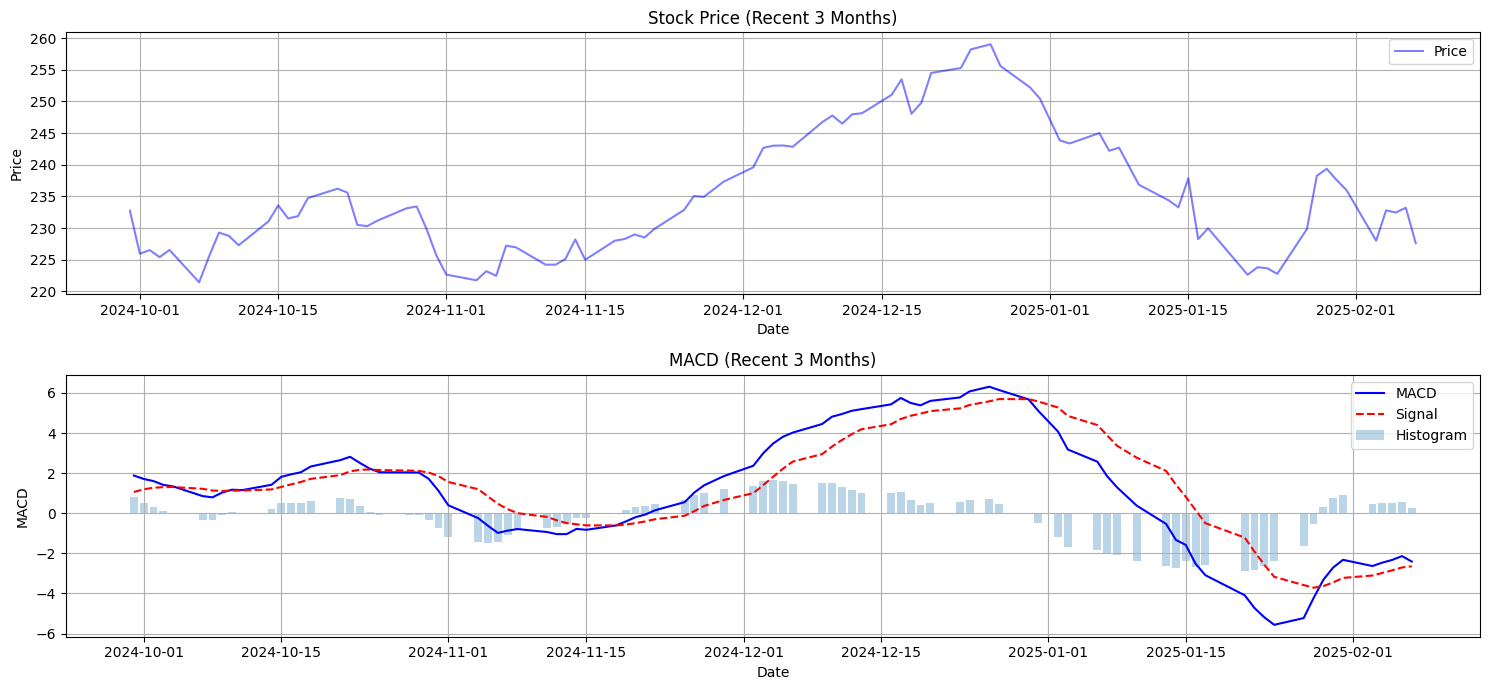

In [ ]:
# MACD 계산
exp1 = df['close'].ewm(span=12, adjust=False).mean()
exp2 = df['close'].ewm(span=26, adjust=False).mean()
df['macd'] = exp1 - exp2
df['signal'] = df['macd'].ewm(span=9, adjust=False).mean()

# 최근 90일 MACD 시각화
recent_3m = df[-90:]

# 서브플롯 생성
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,7))

# 주가 그래프 (위)
ax1.plot(recent_3m.index, recent_3m.close, 'b-', label='Price', alpha=0.5)
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.set_title('Stock Price (Recent 3 Months)')
ax1.grid(True)
ax1.legend()

# MACD 그래프 (아래)
ax2.plot(recent_3m.index, recent_3m.macd, 'b-', label='MACD')
ax2.plot(recent_3m.index, recent_3m.signal, 'r--', label='Signal')
ax2.bar(recent_3m.index, recent_3m.macd - recent_3m.signal, alpha=0.3, label='Histogram')
ax2.set_xlabel('Date')
ax2.set_ylabel('MACD')
ax2.set_title('MACD (Recent 3 Months)')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()



MACD 분석 결과
* MACD 라인이 시그널 라인을 하향 돌파하는 데드크로스가 발생하여 약세 신호를 보임
* 히스토그램이 음수 영역에 위치하고 있어 단기적으로 하락 추세가 지속될 것으로 예상됨
* 2024년 1월 중순부터 MACD와 시그널 라인의 하향 이격이 커지고 있어 매도 압력이 강화되는 중
* 다만 최근 MACD와 시그널 라인의 간격이 좁아지는 추세여서 반등 가능성도 존재


# 볼린저 밴드 (Bollinger Bands)
  - 이동평균선을 중심으로 표준편차를 이용해 상/하한 밴드 설정
  - 주가의 변동성과 추세를 동시에 파악 가능
  - 20일 이동평균선과 ±2 표준편차를 주로 사용

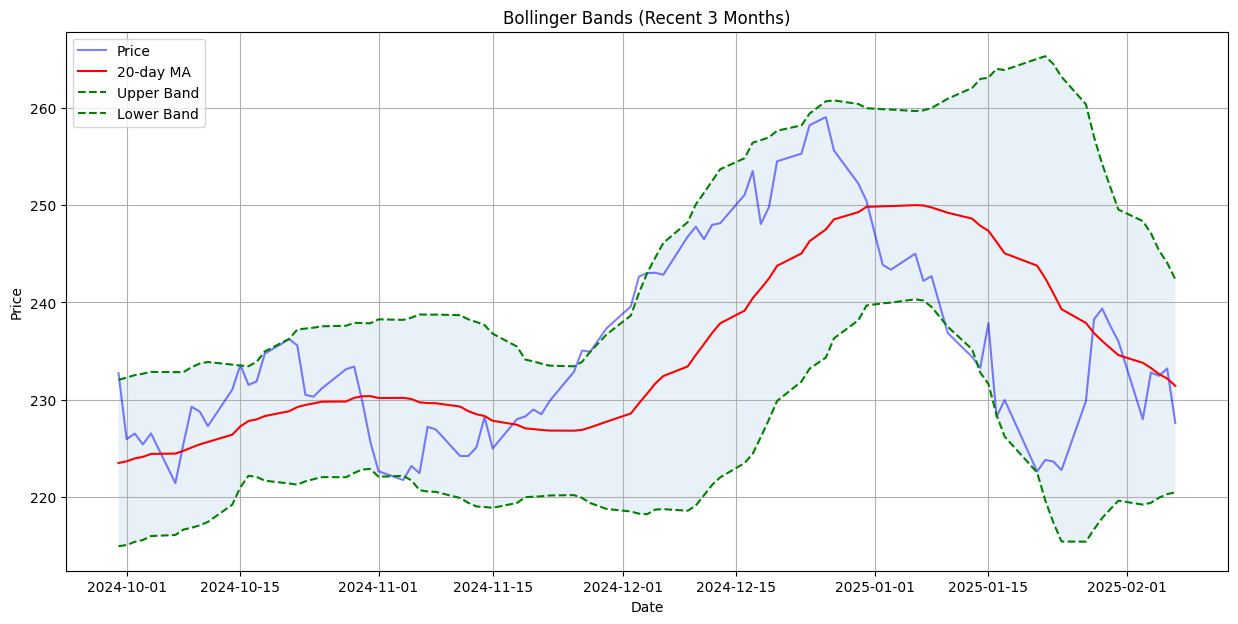

In [ ]:
# Calculate Bollinger Bands
df['ma20'] = df['close'].rolling(window=20).mean()  # 20-day moving average
df['std20'] = df['close'].rolling(window=20).std()  # 20-day standard deviation

df['upper_band'] = df['ma20'] + 2 * df['std20']    # upper band
df['lower_band'] = df['ma20'] - 2 * df['std20']    # lower band

# Visualize recent 90 days Bollinger Bands
recent_3m = df[-90:]

plt.figure(figsize=(15,7))
plt.plot(recent_3m.index, recent_3m.close, 'b-', label='Price', alpha=0.5)
plt.plot(recent_3m.index, recent_3m.ma20, 'r-', label='20-day MA')
plt.plot(recent_3m.index, recent_3m.upper_band, 'g--', label='Upper Band')
plt.plot(recent_3m.index, recent_3m.lower_band, 'g--', label='Lower Band')
plt.fill_between(recent_3m.index, recent_3m.upper_band, recent_3m.lower_band, alpha=0.1)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bollinger Bands (Recent 3 Months)')
plt.grid(True)
plt.legend()
plt.show()



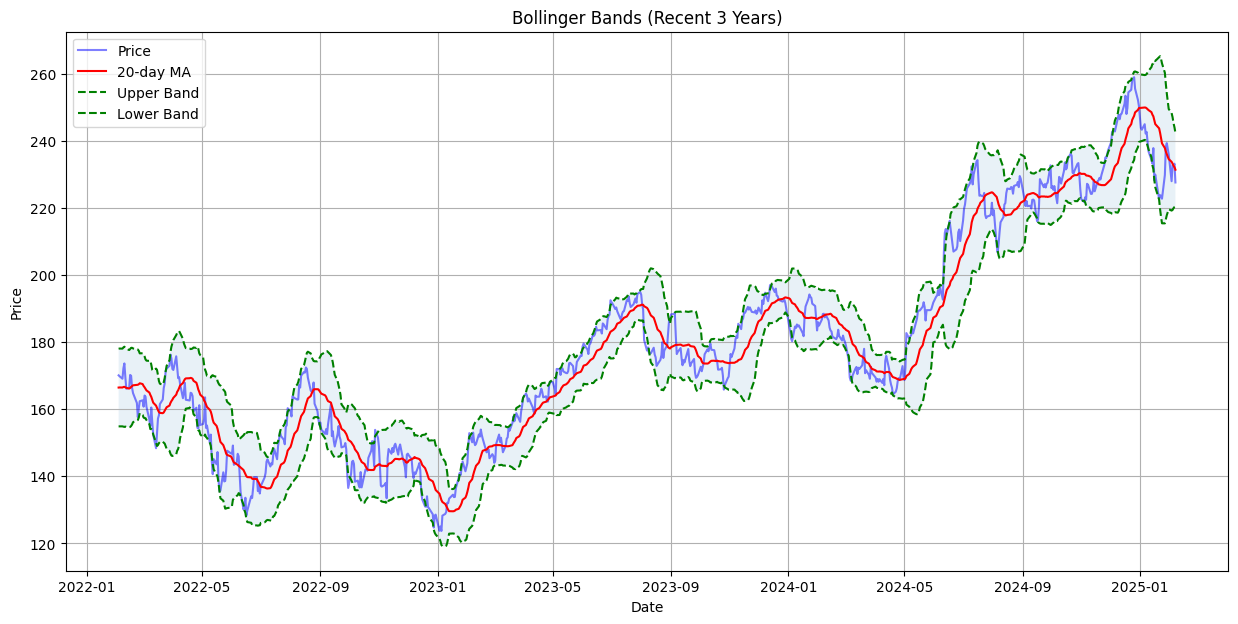

In [ ]:
# Visualize Bollinger Bands for recent 3 years
recent_3y = df[-756:]  # 252 trading days * 3 years

plt.figure(figsize=(15,7))
plt.plot(recent_3y.index, recent_3y.close, 'b-', label='Price', alpha=0.5)
plt.plot(recent_3y.index, recent_3y.ma20, 'r-', label='20-day MA')
plt.plot(recent_3y.index, recent_3y.upper_band, 'g--', label='Upper Band')
plt.plot(recent_3y.index, recent_3y.lower_band, 'g--', label='Lower Band')
plt.fill_between(recent_3y.index, recent_3y.upper_band, recent_3y.lower_band, alpha=0.1)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bollinger Bands (Recent 3 Years)')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
df

# 주식 가격 예측 및 상승 분류를 위한 추가 피쳐 엔지니어링

In [ ]:
# 일일 수익률
df['daily_return'] = df['close'].pct_change()

# 일일 수익률의 이동 평균 (20일)
df['daily_return_ma20'] = df['daily_return'].rolling(window=20).mean()

# 일일 수익률의 표준 편차 (20일)
df['daily_return_std20'] = df['daily_return'].rolling(window=20).std()

# 거래량 이동 평균 (20일)
df['volume_ma20'] = df['volume'].rolling(window=20).mean()

In [ ]:
df

,open,high,low,close,volume,dividends,stock_splits,split_multiplier,ma5,ma20,...,rsi14,macd,signal,std20,upper_band,lower_band,daily_return,daily_return_ma20,daily_return_std20,volume_ma20
Date,,,,,,,,,,,,,,,,,,,,,
1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0,1.0,NaN,NaN,...,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.0,0.0,1.0,NaN,NaN,...,NaN,-0.000411,-0.000082,NaN,NaN,NaN,-0.052171,NaN,NaN,NaN
1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.0,0.0,1.0,NaN,NaN,...,NaN,-0.001277,-0.000321,NaN,NaN,NaN,-0.073398,NaN,NaN,NaN
1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.0,0.0,1.0,NaN,NaN,...,NaN,-0.001770,-0.000611,NaN,NaN,NaN,0.024751,NaN,NaN,NaN
1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.0,0.0,1.0,0.091959,NaN,...,NaN,-0.001930,-0.000875,NaN,NaN,NaN,0.028993,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-03 00:00:00-05:00,229.990005,231.830002,225.699997,228.009995,73063300,0.0,0.0,224.0,235.843997,233.794999,...,44.142989,-2.633402,-3.105906,7.275831,248.346661,219.243337,-0.033856,-0.003166,0.019796,60880715.0
2025-02-04 00:00:00-05:00,227.250000,233.130005,226.649994,232.800003,45067300,0.0,0.0,224.0,234.751999,233.266999,...,49.587774,-2.464083,-2.977541,6.919620,247.106239,219.427759,0.021008,-0.002015,0.020522,61121875.0
2025-02-05 00:00:00-05:00,228.529999,232.669998,228.270004,232.470001,39620300,0.0,0.0,224.0,233.373999,232.640499,...,44.996301,-2.329669,-2.847967,6.344760,245.330018,219.950980,-0.001418,-0.002423,0.020420,60850610.0


In [ ]:
df.isna().sum()

,0
open,0
high,0
low,0
close,0
volume,0
dividends,0
stock_splits,0
split_multiplier,0
ma5,4
ma20,19


- 결측치는 이동 평균 및 표준 편차 계산 시, 초기 데이터 포인트가 부족하여 발생합니다.
- 예를 들어, 120일 이동 평균을 계산하려면 최소 120일의 데이터가 필요합니다.
- 따라서 초기 119일 동안은 결측치가 발생하게 됩니다.
- 결측치가 존재하는 rows는 삭제합니다.




In [ ]:
df = df.dropna()
df.isna().sum().sum()

0

---

In [ ]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'dividends', 'stock_splits',
       'split_multiplier', 'ma5', 'ma20', 'ma60', 'ma120', 'rsi14', 'macd',
       'signal', 'std20', 'upper_band', 'lower_band', 'daily_return',
       'daily_return_ma20', 'daily_return_std20', 'volume_ma20'],
      dtype='object')

In [ ]:
df.daily_return

,daily_return
Date,
1981-06-04 00:00:00-04:00,0.019841
1981-06-05 00:00:00-04:00,-0.015564
1981-06-08 00:00:00-04:00,-0.035571
1981-06-09 00:00:00-04:00,0.020490
1981-06-10 00:00:00-04:00,0.012047
...,...
2025-02-03 00:00:00-05:00,-0.033856
2025-02-04 00:00:00-05:00,0.021008
2025-02-05 00:00:00-05:00,-0.001418


---

# 상승 분류 모델 제작을 위한 label 생성

In [ ]:
# 일일 수익률이 0.01보다 크면 1, 그렇지 않으면 0을 할당하여 'bull' 열을 생성합니다.
df['bull'] = df['daily_return'].apply(lambda x: 1 if x > 0.01 else 0)
df

,open,high,low,close,volume,dividends,stock_splits,split_multiplier,ma5,ma20,...,macd,signal,std20,upper_band,lower_band,daily_return,daily_return_ma20,daily_return_std20,volume_ma20,bull
Date,,,,,,,,,,,,,,,,,,,,,
1981-06-04 00:00:00-04:00,0.110437,0.110867,0.110437,0.110437,56067200,0.0,0.0,1.0,0.110952,0.102444,...,0.004541,0.003947,0.008215,0.118875,0.086014,0.019841,0.008357,0.026287,35506240.0,1
1981-06-05 00:00:00-04:00,0.109148,0.109148,0.108718,0.108718,57680000,0.0,0.0,1.0,0.109921,0.103110,...,0.004299,0.004017,0.008154,0.119418,0.086803,-0.015564,0.006894,0.026784,37922080.0,0
1981-06-08 00:00:00-04:00,0.105281,0.105281,0.104851,0.104851,93497600,0.0,0.0,1.0,0.108117,0.103540,...,0.003752,0.003964,0.007998,0.119537,0.087543,-0.035571,0.004665,0.028404,42201600.0,0
1981-06-09 00:00:00-04:00,0.106999,0.107429,0.106999,0.106999,119593600,0.0,0.0,1.0,0.107859,0.104185,...,0.003452,0.003862,0.007713,0.119610,0.088759,0.020490,0.006806,0.027872,47584320.0,1
1981-06-10 00:00:00-04:00,0.108288,0.109577,0.108288,0.108288,25222400,0.0,0.0,1.0,0.107859,0.104894,...,0.003280,0.003745,0.007382,0.119658,0.090129,0.012047,0.007408,0.027847,48632640.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-03 00:00:00-05:00,229.990005,231.830002,225.699997,228.009995,73063300,0.0,0.0,224.0,235.843997,233.794999,...,-2.633402,-3.105906,7.275831,248.346661,219.243337,-0.033856,-0.003166,0.019796,60880715.0,0
2025-02-04 00:00:00-05:00,227.250000,233.130005,226.649994,232.800003,45067300,0.0,0.0,224.0,234.751999,233.266999,...,-2.464083,-2.977541,6.919620,247.106239,219.427759,0.021008,-0.002015,0.020522,61121875.0,1
2025-02-05 00:00:00-05:00,228.529999,232.669998,228.270004,232.470001,39620300,0.0,0.0,224.0,233.373999,232.640499,...,-2.329669,-2.847967,6.344760,245.330018,219.950980,-0.001418,-0.002423,0.020420,60850610.0,0


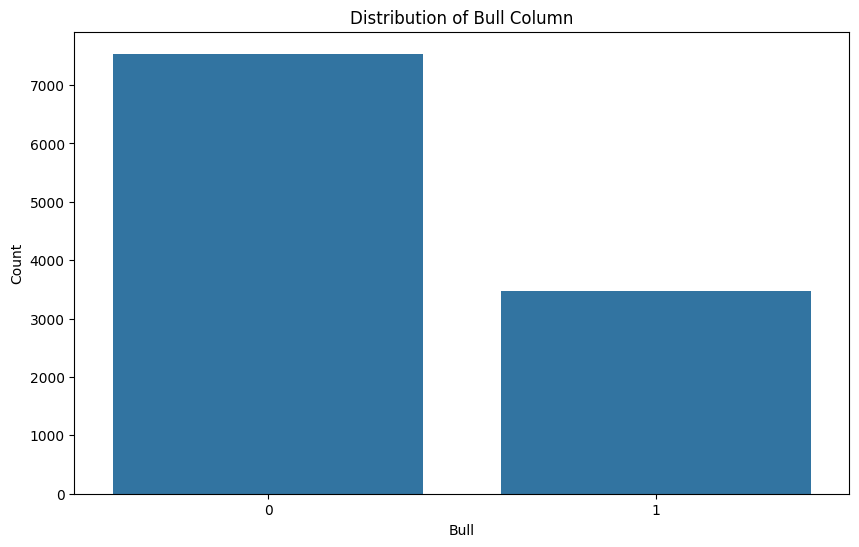

In [ ]:
import seaborn as sns

# bull 컬럼의 값 분포를 확인합니다.
df['bull'].value_counts()

# bull 컬럼의 값 분포를 시각화합니다.
plt.figure(figsize=(10, 6))
sns.countplot(x='bull', data=df)
plt.title('Distribution of Bull Column')
plt.xlabel('Bull')
plt.ylabel('Count')
plt.show()

daily_return          0.679291
rsi14                 0.146785
daily_return_ma20     0.130571
daily_return_std20    0.111222
volume                0.108975
lower_band            0.059722
ma20                  0.058588
ma5                   0.058497
open                  0.058105
ma60                  0.057896
upper_band            0.057537
ma120                 0.057329
split_multiplier      0.057075
low                   0.056737
high                  0.055873
close                 0.054398
volume_ma20           0.054382
std20                 0.035740
signal                0.035483
dividends             0.029929
stock_splits          0.022519
macd                  0.019329
Name: bull, dtype: float64


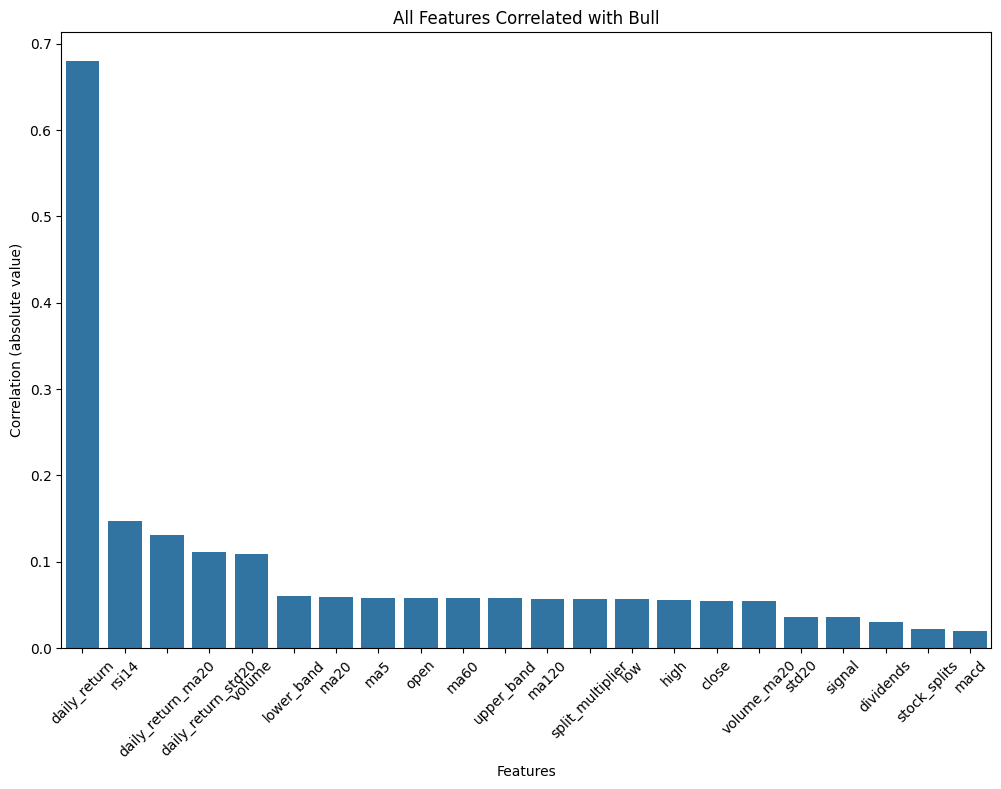

In [ ]:
# correlation_matrix을 구합니다.
correlation_matrix = df.corr()

# bull 컬럼과 상관계수가 높은 모든 컬럼을 절대값 기준으로 정렬합니다.
all_corr = correlation_matrix['bull'].abs().sort_values(ascending=False)[1:]  # bull 컬럼 제외
print(all_corr)

# 상관계수가 높은 모든 컬럼들을 시각화합니다.
plt.figure(figsize=(12, 8))
sns.barplot(x=all_corr.index, y=all_corr.values)
plt.title('All Features Correlated with Bull')
plt.xlabel('Features')
plt.ylabel('Correlation (absolute value)')
plt.xticks(rotation=45)
plt.show()


----

# 급상승 데이터 분석

In [ ]:
df.daily_return.describe()

,daily_return
count,11011.000000
mean,0.001085
std,0.027688
min,-0.518692
25%,-0.012561
50%,0.000000
75%,0.014303
max,0.332281


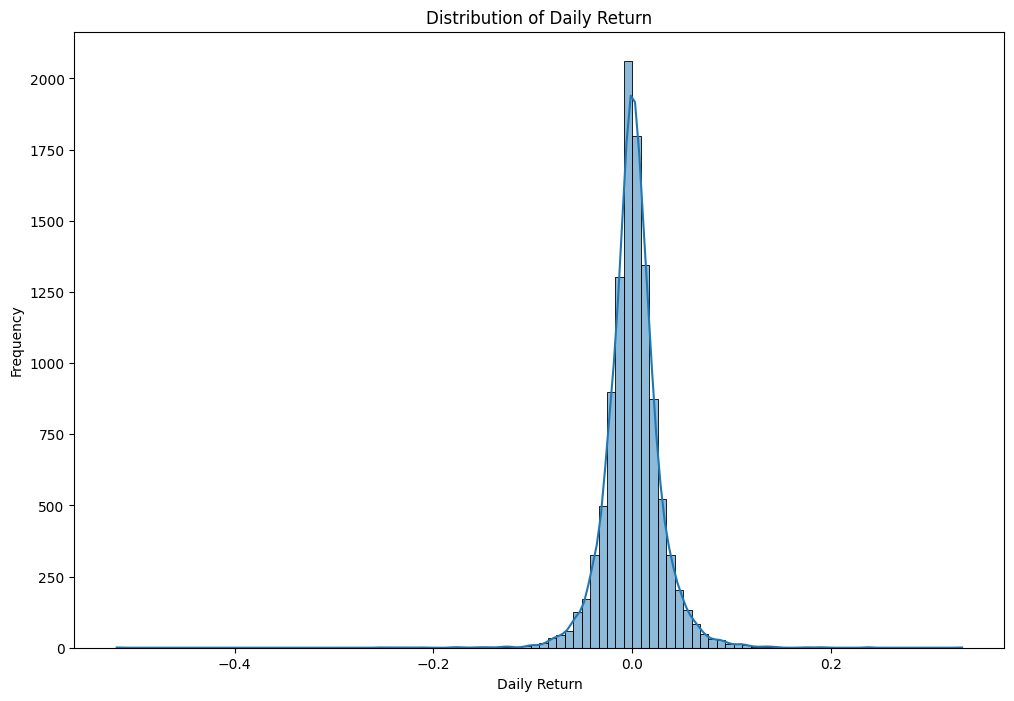

In [ ]:
# daily_return의 분포를 시각화합니다.
plt.figure(figsize=(12, 8))
sns.histplot(df['daily_return'], bins=100, kde=True)
plt.title('Distribution of Daily Return')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# daily_return의 값이 0.1 이상이면 super_bull에 1을 할당해.
df['super_bull'] = df['daily_return'].apply(lambda x: 1 if x >= 0.1 else 0)

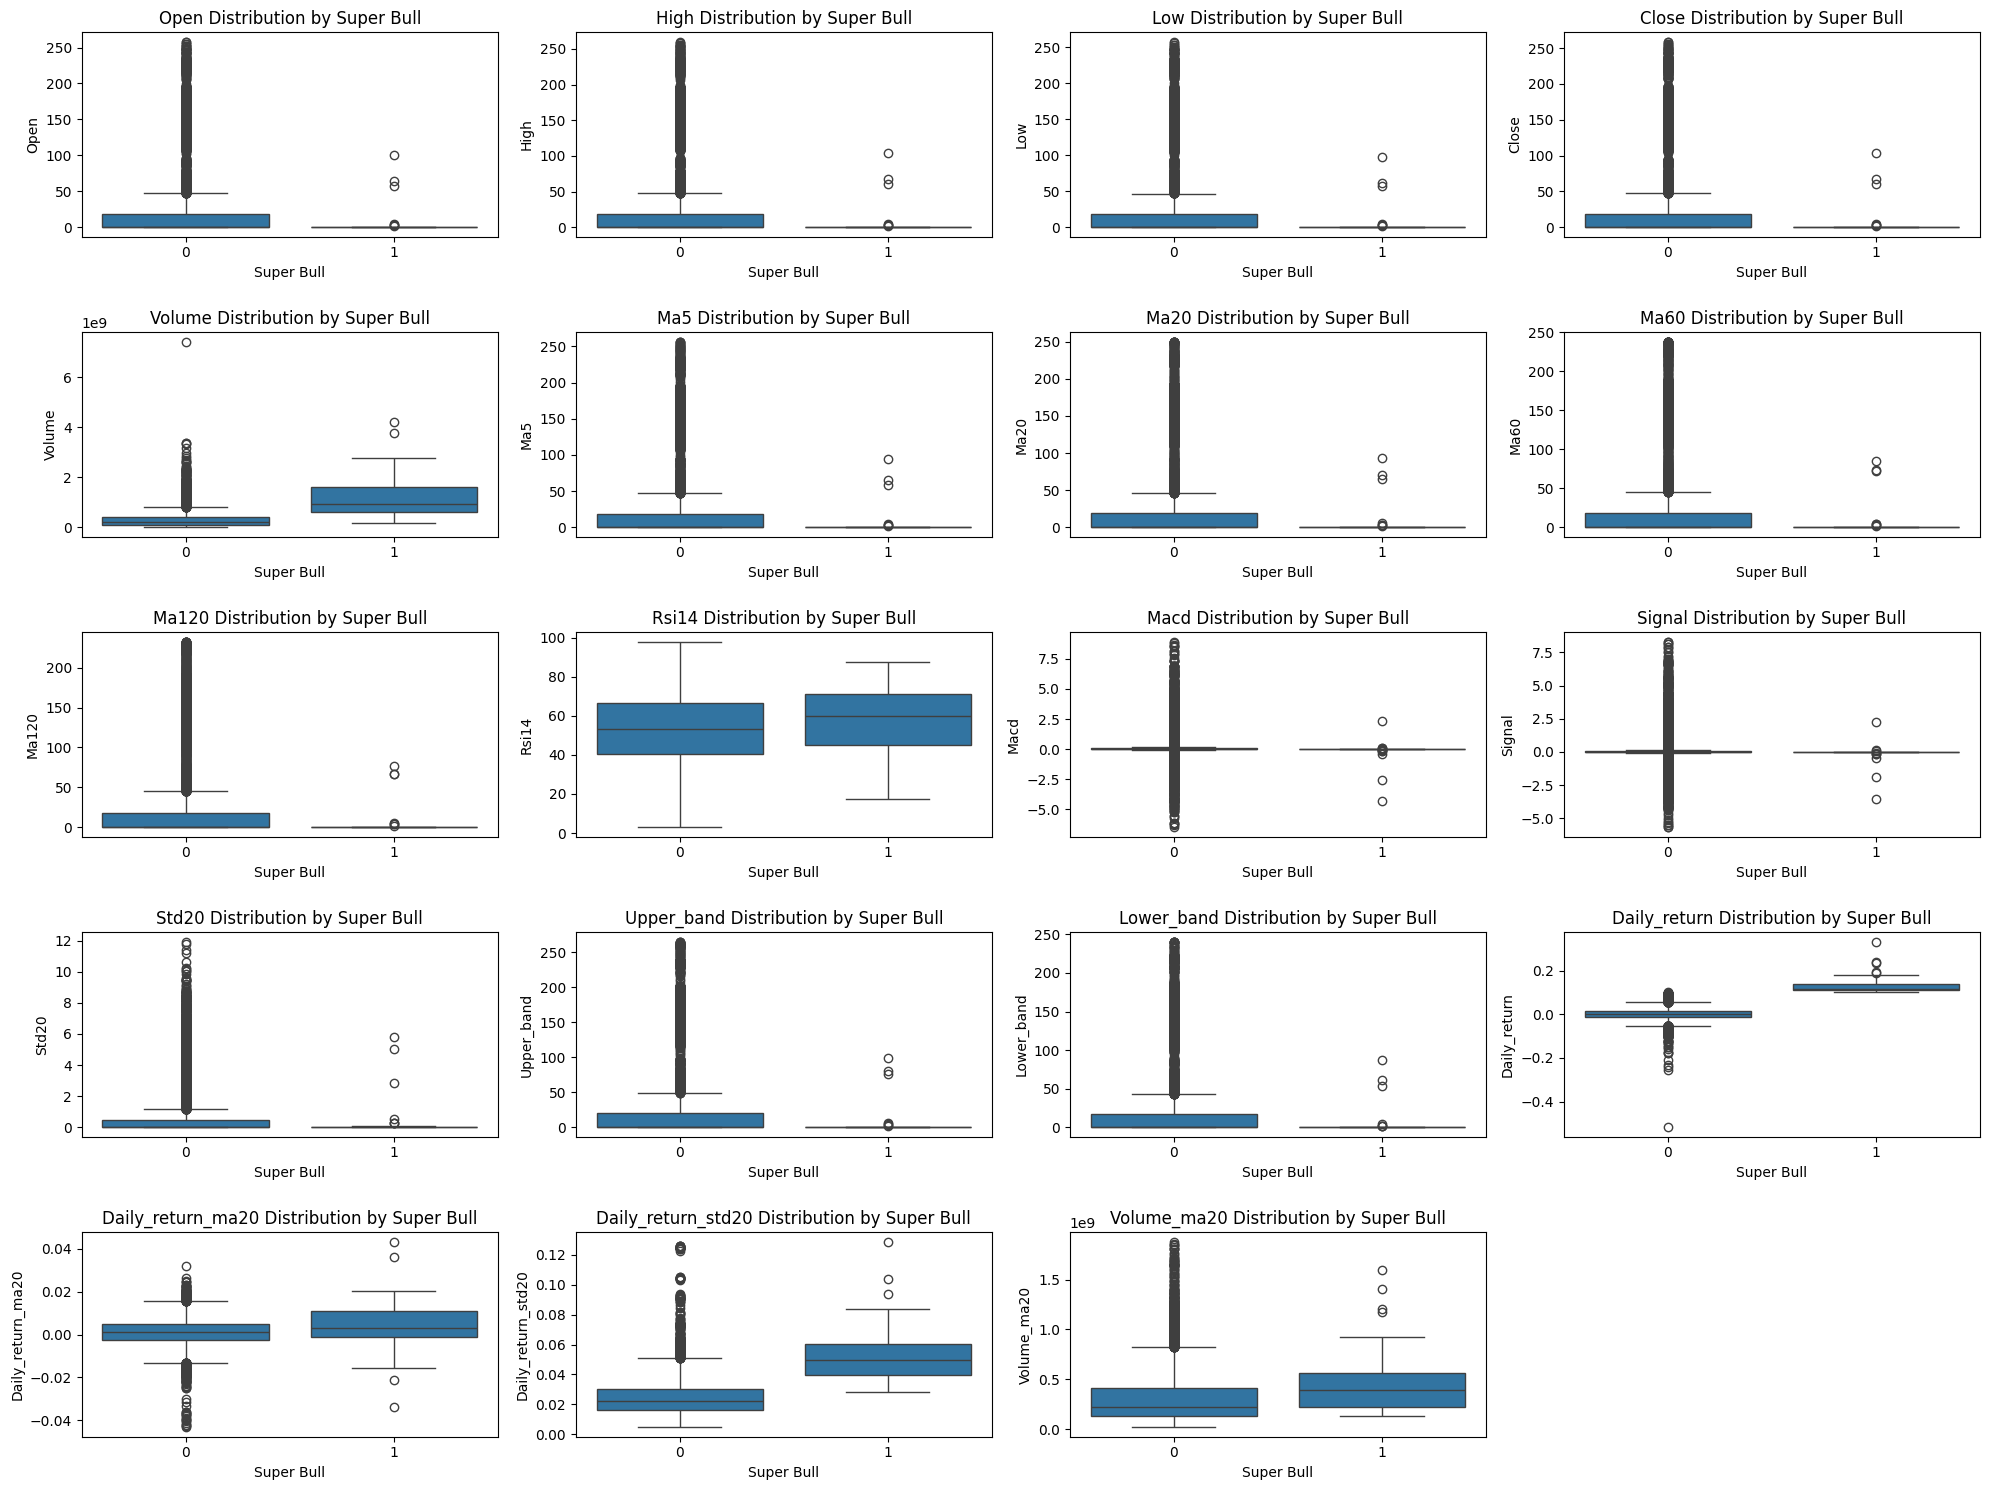

In [ ]:
# super_bull이 1인 것들과 아닌 것들의 다른 컬럼들이 어떻게 경향이 다른지 시각화합니다.
plt.figure(figsize=(20, 15))

# open, high, low, close, volume, ma5, ma20, ma60, ma120, rsi14, macd, signal, std20, upper_band, lower_band, daily_return, daily_return_ma20, daily_return_std20, volume_ma20 컬럼에 대해 boxplot을 그립니다.
columns_to_plot = ['open', 'high', 'low', 'close', 'volume', 'ma5', 'ma20', 'ma60', 'ma120', 'rsi14', 'macd', 'signal', 'std20', 'upper_band', 'lower_band', 'daily_return', 'daily_return_ma20', 'daily_return_std20', 'volume_ma20']
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(x='super_bull', y=column, data=df)
    plt.title(f'{column.capitalize()} Distribution by Super Bull')
    plt.xlabel('Super Bull')
    plt.ylabel(column.capitalize())

plt.tight_layout()
plt.show()


----

# 데이터를 차원 축소하여 시각화


- PCA (Principal Component Analysis)와 t-SNE (t-Distributed Stochastic Neighbor Embedding)는 모두 차원 축소 기법이지만, 그 목적과 방법이 다릅니다.

- PCA와 t-SNE 모두 고차원 데이터를 저차원으로 변환하여 시각화를 용이하게 하는 기법입니다.

- PCA는 데이터의 분산을 최대한 보존하면서 주요 패턴을 찾고, 노이즈를 줄이는 선형 기법입니다.

- t-SNE는 데이터의 국소적인 구조를 보존하면서 클러스터링을 시각화하고, 데이터 간의 유사성을 강조하는 비선형 기법입니다.

- 요약하자면, PCA는 데이터의 전체적인 분산을 보존하는 데 중점을 두고, t-SNE는 데이터의 국소적인 유사성을 보존하는 데 중점을 둡니다.


### PCA

In [ ]:
from sklearn.decomposition import PCA
import plotly.express as px

# PCA를 사용하여 데이터의 차원을 3차원으로 축소합니다.
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df.drop(columns=['super_bull', 'daily_return', 'bull']))

# PCA 결과를 새로운 데이터프레임에 저장합니다.
pca_df = pd.DataFrame(data=pca_result, columns=['pca_one', 'pca_two', 'pca_three'])
pca_df['daily_return'] = df['daily_return'].values

# daily_return을 기준으로 다른 색으로 시각화합니다.
fig = px.scatter_3d(pca_df, x='pca_one', y='pca_two', z='pca_three', color='daily_return', title='3D PCA of Stock Data by Daily Return', size_max=1)
fig.show()


- 이 3D PCA 시각화는 주식 데이터의 일일 수익률에 따른 분포를 보여줍니다.   

- 그래프에서 볼 수 있듯이, 대부분의 데이터 포인트는 특정 영역에 집중되어 있으며,   

- 이는 일일 수익률이 특정 범위 내에서 변동하는 경향이 있음을 시사합니다.   

- 또한, 일부 데이터 포인트는 다른 영역에 위치하여 극단적인 수익률을 나타낼 수 있습니다.   


### t-SNE

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

# T-sne를 사용하여 데이터의 차원을 3차원으로 축소합니다.
tsne = TSNE(n_components=3, random_state=42)
tsne_result = tsne.fit_transform(df.drop(columns=['super_bull', 'daily_return', 'bull']))

# T-sne 결과를 새로운 데이터프레임에 저장합니다.
tsne_df = pd.DataFrame(data=tsne_result, columns=['tsne_one', 'tsne_two', 'tsne_three'])
tsne_df['daily_return'] = df['daily_return'].values

# daily_return의 값에 따라 다른 색으로 시각화합니다.
fig = px.scatter_3d(tsne_df, x='tsne_one', y='tsne_two', z='tsne_three', color='daily_return', title='3D T-sne of Stock Data by Daily Return')
fig.show()


In [ ]:
from sklearn.cluster import KMeans

# bull과 절대값 기준으로 상관관계가 가장 높았던 3개 컬럼을 찾습니다.
correlation_matrix = df.corr().abs()
top_3_columns = correlation_matrix['bull'].sort_values(ascending=False).index[1:4]

# KMeans를 사용하여 데이터의 군집을 4개로 나눕니다.
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_result = kmeans.fit_predict(df[top_3_columns])

# KMeans 결과를 새로운 데이터프레임에 저장합니다.
kmeans_df = df.copy()
kmeans_df['kmeans_cluster'] = kmeans_result

# 군집 결과를 시각화합니다.
fig = px.scatter_3d(kmeans_df, x=top_3_columns[0], y=top_3_columns[1], z=top_3_columns[2], color='kmeans_cluster', title='3D Scatter of Stock Data by KMeans Clusters')
fig.show()


In [ ]:
kmeans_df.columns

---

# Baseline characteristics

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# 전체 숫자 표시 설정
pd.options.display.float_format = "{:.4f}".format

group_col = "kmeans_cluster"

table_rows = []
for col in df.columns:
    group_vals = []
    for c in sorted(kmeans_df[group_col].unique()):
        group_data = kmeans_df[kmeans_df[group_col]==c][col].dropna()
        group_vals.append(group_data)
    f_stat, p_val = f_oneway(*group_vals)
    means = [g.mean() for g in group_vals]
    table_rows.append([col, *means, round(p_val,4)])

col_names = ["Var"] + [f"Mean_Cluster{i}" for i in range(4)] + ["p-value"]
result_df = pd.DataFrame(table_rows, columns=col_names)
result_df

- RSI14가 높아 과매수 상태로 해석 가능함    

- 거래량 또한 높아 유동성 큰 편임    

- MACD와 signal이 양의 값으로 추세상 상승세 가능성 있음    

- daily_return_ma20이 가장 높아 최근 추세 우상향 경향 보임    
